In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv("~/dev/gachon-ai/datasets/car_evaluation.csv", names=column_names, header=None)
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [2]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [3]:
y = df["class"]
X = df.drop("class", axis=1)

In [4]:
X = pd.get_dummies(X)
y = pd.get_dummies(y)

In [5]:
X.head()

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,False,False,True,False,True,False
1,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,False,False,True,False,False,True
2,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,False,False,True,True,False,False
3,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,False,True,False,False,True,False
4,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,False,True,False,False,False,True


In [6]:
y.head()

,acc,good,unacc,vgood
0,False,False,True,False
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False
4,False,False,True,False


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

train_ds = tf.data.Dataset.from_tensor_slices((X_train.values, y_train)).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((X_test.values, y_test)).batch(32)

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])


N_EPOCHS = 30
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_ds, epochs=N_EPOCHS, validation_data=test_ds)

Epoch 1/30
44/44 [==============================] - 0s 2ms/step - loss: 1.0222 - accuracy: 0.6447 - val_loss: 0.8072 - val_accuracy: 0.6792
Epoch 2/30
44/44 [==============================] - 0s 594us/step - loss: 0.6799 - accuracy: 0.7113 - val_loss: 0.6026 - val_accuracy: 0.7110
Epoch 3/30
44/44 [==============================] - 0s 683us/step - loss: 0.4901 - accuracy: 0.7880 - val_loss: 0.4217 - val_accuracy: 0.8555
Epoch 4/30
44/44 [==============================] - 0s 595us/step - loss: 0.3595 - accuracy: 0.8683 - val_loss: 0.3254 - val_accuracy: 0.8671
Epoch 5/30
44/44 [==============================] - 0s 575us/step - loss: 0.2861 - accuracy: 0.8886 - val_loss: 0.2680 - val_accuracy: 0.8815
Epoch 6/30
44/44 [==============================] - 0s 579us/step - loss: 0.2372 - accuracy: 0.9132 - val_loss: 0.2288 - val_accuracy: 0.9133
Epoch 7/30
44/44 [==============================] - 0s 593us/step - loss: 0.2004 - accuracy: 0.9284 - val_loss: 0.1987 - val_accuracy: 0.9335
Epoch 8/

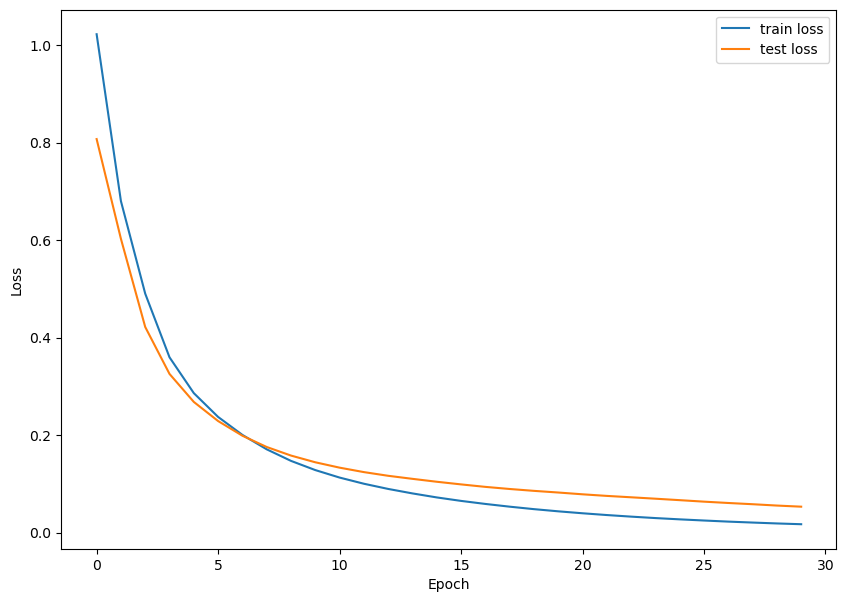

In [11]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()